In [117]:
import pandas as pd
import scipy.stats as stats
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Concatenate our files. Reminder: we have a file per year, we all of 'Informatique' in it.

In [26]:
# requires os
def concatFiles(direc, fileType):
    files = os.listdir(direc)
    if '.DS_Store' in files:
        files.remove('.DS_Store')
    print(files)
    if fileType == 'csv':
        r = pd.read_csv
    for idx, file in enumerate(files):
        file = direc+file
        if idx == 0:
            df = r(file, header=0)
            print(file)
        else:
            new = r(file, header=0)
            df = pd.concat([df, new], axis=0)
            print(file)
    return df

In [27]:
info = concatFiles('data/', 'csv')

['informatique_2011_2012.csv', 'informatique_2014_2015.csv', 'informatique_2012_2013.csv', 'informatique_2008_2009.csv', 'informatique_2007_2008.csv', 'informatique_2016_2017.csv', 'informatique_2015_2016.csv', 'informatique_2010_2011.csv', 'informatique_2013_2014.csv', 'informatique_2009_2010.csv', '.~lock.informatique_2013_2014.csv#']
data/informatique_2011_2012.csv
data/informatique_2014_2015.csv
data/informatique_2012_2013.csv
data/informatique_2008_2009.csv
data/informatique_2007_2008.csv
data/informatique_2016_2017.csv
data/informatique_2015_2016.csv
data/informatique_2010_2011.csv
data/informatique_2013_2014.csv
data/informatique_2009_2010.csv
data/.~lock.informatique_2013_2014.csv#


We want to take only the data for the Master students


In [28]:
def locator(s):
    return s.find('Master') != -1

In [29]:
ma = info.loc[info['Semester'].apply(locator)]
ma.head()


,13.10.2016 14:53,Civilité,Ecole Echange,Filière opt.,Mineur,No Sciper,Nom Prénom,Orientation Bachelor,Orientation Master,Period,Semester,Spécialisation,Statut,Subject,Type Echange,Unnamed: 0,file:///home/gael/.config/libreoffice/4;,gael,gael-Alienware-15-R2
574,NaN,Monsieur,NaN,NaN,NaN,184772.0,Arnfred Jonas,NaN,NaN,2011-2012,Master semestre 1,NaN,Présent,Informatique,NaN,NaN,NaN,NaN,NaN
575,NaN,Monsieur,NaN,NaN,NaN,211754.0,Asgari Ehsaneddin,NaN,NaN,2011-2012,Master semestre 1,NaN,Présent,Informatique,NaN,NaN,NaN,NaN,NaN
576,NaN,Monsieur,NaN,NaN,NaN,179406.0,Baeriswyl Jonathan,NaN,NaN,2011-2012,Master semestre 1,NaN,Présent,Informatique,NaN,NaN,NaN,NaN,NaN
577,NaN,Madame,NaN,NaN,NaN,209850.0,Bai Yi,NaN,NaN,2011-2012,Master semestre 1,NaN,Présent,Informatique,NaN,NaN,NaN,NaN,NaN
578,NaN,Monsieur,NaN,NaN,NaN,179428.0,Barroco Michael,NaN,NaN,2011-2012,Master semestre 1,NaN,Présent,Informatique,NaN,NaN,NaN,NaN,NaN


We define a function to locate a specific sciper #. They are unique.

In [30]:
def locSciper(df, sciper):
    return df.loc[df['No Sciper'] == sciper]

In [31]:
def getGender(df):
    """ Take a DataFrame and checks the gender
    
    Args:
        df (DataFrame): a DataFrame, typically a .loc on a specific student
        
    Returns:
        bool: True if student is a woman, False otherwise
    """
    try:
        if df.isin(['Madame'])['Civilité'].value_counts()[True] > 0:
            return 1
    except KeyError:
        return 0

In [32]:
def getMaster3(df):
    """ Take a DataFrame and checks if the student had a Master Project
    
    Args:
        df (DataFrame): a DataFrame, typically a .loc on a specific student
        
    Returns:
        bool: True if student had a Master 3, False otherwise
    """
    try:
        if df.isin(['Master semestre 3'])['Semester'].value_counts()[True] > 0:
            return 1
    except KeyError:
        return 0    

In [33]:
def getMasterProject(df):
    """ Take a DataFrame and checks if the student had a Master Project
    
    Args:
        df (DataFrame): a DataFrame, typically a .loc on a specific student
        
    Returns:
        bool: True if student had a Master 3, False otherwise
    """
    try:
        if df.isin(['Projet Master automne'])['Semester'].value_counts()[True] > 0:
            return 1
        elif df.isin(['Projet Master printemps'])['Semester'].value_counts()[True] > 0:
            return 1        
    except KeyError:
        return 0  

In [34]:
def isOneTwo(df):
    """ Take a DataFrame and check that there is an entry for both BA1 and BA6
    
    Args:
        df (DataFrame): a DataFrame, typically a .loc on a specific student
        
    Returns:
        bool: True if it finds both BA1 and BA6, False otherwise
    """
    try:
        one = df.isin(['Master semestre 1'])['Semester'].value_counts()[True] > 0
    except KeyError:
        one = 0
    try:
        two = df.isin(['Master semestre 2'])['Semester'].value_counts()[True] > 0
    except KeyError:
        two = 0
    return (one and two)

In [59]:
def started_before_2015(df):
    """ Take a DataFrame and check that there is an entry for both BA1 and BA6
    
    Args:
        df (DataFrame): a DataFrame, typically a .loc on a specific student
        
    Returns:
        bool: True if it finds both BA1 and BA6, False otherwise
    """
    wrong_years = ['2015-2016', '2016-2017'] 
    
    try:
        periods_ba1 = df.loc[df['Semester'] == 'Master semestre 1'].Period
        if any(years in wrong_years for years in periods_ba1):
            return False
        else:
            return True
    except KeyError:
        return False

Loop through all the students


In [60]:
# We need to remove the students who started too late. 
# Let's say 2 sem without spec. 3 sem with spec

dico = {'sciper': [], 'gender': [], 'length': [], 
        'Master3': [], 'MasterProject': [], 'Specialization':[]}
# Do some tests
for row in ma.iterrows():
    o = row[1]
    sciper = o['No Sciper']
    if not sciper in dico['sciper']:
        df = locSciper(ma, sciper)
        if isOneTwo(df) and started_before_2015(df):
            dico['sciper'].append(sciper)
            dico['gender'].append(getGender(df))
            # Calculating length of stay by nbr of rows
            dico['length'].append(len(df))
            dico['MasterProject'].append(getMasterProject(df))
            dico['Master3'].append(getMaster3(df))
            dico['Specialization'].append(o['Spécialisation'])

In [61]:
data = pd.DataFrame(dico)
data.head()

,Master3,MasterProject,Specialization,gender,length,sciper
0,1,0,NaN,0,3,184772.0
1,1,0,NaN,0,4,211754.0
2,1,0,NaN,0,4,179406.0
3,1,0,NaN,1,3,209850.0
4,0,0,NaN,0,2,179428.0


In [63]:
data.length.describe()

count    622.000000
mean       3.461415
std        1.089087
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: length, dtype: float64

2 is wrong


In [68]:
data = data.drop(data[data.length < 3].index)

In [69]:
data.length.describe()

count    509.000000
mean       3.785855
std        0.932419
min        3.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        8.000000
Name: length, dtype: float64

In [70]:
data_spec = data[~data["Specialization"].isnull()]
data_spec.head()

,Master3,MasterProject,Specialization,gender,length,sciper
11,1,0,"Signals, Images and Interfaces",0,4,184991.0
21,1,0,Internet computing,0,4,214805.0
24,1,0,Software Systems,0,3,185853.0
28,1,0,"Signals, Images and Interfaces",0,4,147008.0
48,1,0,Foundations of Software,0,5,186250.0


In [75]:
data_spec.Specialization.unique()

array(['Signals, Images and Interfaces', 'Internet computing',
       'Software Systems', 'Foundations of Software', 'Service science',
       'Computer Engineering - SP', 'Information Security - SP',
       'Biocomputing'], dtype=object)

In [103]:
data_spec.groupby(['Specialization']).count()

,Master3,MasterProject,gender,length,sciper
Specialization,,,,,
Biocomputing,2,2,2,2,2
Computer Engineering - SP,5,5,5,5,5
Foundations of Software,39,39,39,39,39
Information Security - SP,1,1,1,1,1
Internet computing,54,54,54,54,54
Service science,3,3,3,3,3
"Signals, Images and Interfaces",16,16,16,16,16
Software Systems,7,7,7,7,7


In [104]:
mean_spec = data_spec.groupby(['Specialization']).mean()
mean_spec

,Master3,MasterProject,gender,length,sciper
Specialization,,,,,
Biocomputing,1.000000,0.000000,0.500000,5.500000,162153.500000
Computer Engineering - SP,1.000000,0.000000,0.000000,3.200000,179925.600000
Foundations of Software,0.974359,0.025641,0.076923,3.923077,182902.692308
Information Security - SP,1.000000,1.000000,0.000000,5.000000,212859.000000
Internet computing,0.962963,0.055556,0.092593,3.888889,189945.148148
Service science,1.000000,0.333333,0.333333,3.666667,204981.000000
"Signals, Images and Interfaces",1.000000,0.062500,0.000000,4.562500,179721.375000
Software Systems,1.000000,0.285714,0.000000,4.000000,202037.571429


In [82]:
mean_spec.length.max()

5.5

In [100]:
for spec in data_spec.Specialization.unique():
    print(spec)
    students = data_spec.loc[data_spec.Specialization == spec]
    print(stats.ttest_ind(a=data.length, b=students.length, ))
    print()

Signals, Images and Interfaces
Ttest_indResult(statistic=-3.2419654448327786, pvalue=0.001262750878107682)

Internet computing
Ttest_indResult(statistic=-0.76487459537059066, pvalue=0.44466784823070771)

Software Systems
Ttest_indResult(statistic=-0.60432756957698608, pvalue=0.5458925291219503)

Foundations of Software
Ttest_indResult(statistic=-0.88414519848505302, pvalue=0.37700698981463265)

Service science
Ttest_indResult(statistic=0.22052188201440165, pvalue=0.82555298215558104)

Computer Engineering - SP
Ttest_indResult(statistic=1.4023327283794929, pvalue=0.16142192050351803)

Information Security - SP
Ttest_indResult(statistic=nan, pvalue=nan)

Biocomputing
Ttest_indResult(statistic=-2.5958593914470725, pvalue=0.0097080047358320039)



/home/gael/.local/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


# Bonus


In [105]:
men = data.loc[data.gender == 0]
men.length.mean()

3.7904328018223237

In [106]:
women = data.loc[data.gender == 1]
women.length.mean()

3.757142857142857

In [119]:
stats.ttest_ind(a=women.length, b=men.length, )
# Not significant at all

Ttest_indResult(statistic=-0.27715914580813888, pvalue=0.78177087441803716)

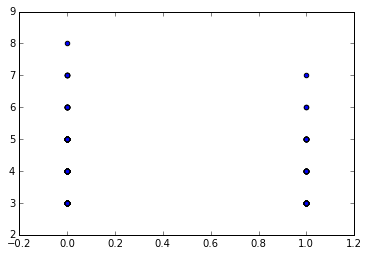

In [122]:
plt.figure()
plt.scatter(np.zeros(len(men)), men.length)
plt.scatter(np.ones(len(women)), women.length)
plt.show() 
# Me no comprendo what to do with scatter plots.. ^^